In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import glob
import re

In [6]:
data =None
path = Path(os.path.join(os.getcwd(), "output/categories.txt"))
with open(path, 'r') as f:
    for l in f:
        data=(l.strip().split(','))
for d in data:
    print(d)

["water"
 "night scene mode"
 "dont play games"
 "overall UI interaction"
 "aftersales service of small factories"
 "2K LCD screen"
 "visual impact"
 "bright screen"
 "photo experience.If"
 "latency"
 "ISO key combination"
 "system setting"
 "scan the code"
 "take photos"
 "like"
 "high refresh rate strategy"
 "low frequency"
 "battery lifetime"
 "taking pictures
 taking pictures"
 "1000"
 "rangle"
 "Play the King of Glory"
 "120w fast charge"
 "threefinger screenshots"
 "functionality"
 "game experience"
 "realtime shooting"
 "rear"
 "lasts for"
 "Workmanship"
 "shooting casually"
 "background"
 "67w single cell"
 "capture"
 "positioning"
 "games"
 "motherboard"
 "other"
 "charge 55W"
 "Magnetic Cooling Back Clip"
 "R corner"
 "ultimate stable frame rate"
 "Samsung e3 90hz"
 "100 million pixel mode"
 "large nuclear frequency"
 "Qualcomm baseband"
 "width"
 "daytime light comparison
 HDR"
 "consume power"
 "portraits"
 "processors"
 "fringe"
 "market feedback"
 "blood recovery"
 "baseb

In [7]:
new_df=pd.DataFrame({"categories": data})
def remove_special(text):
    special_char =['[',']','"']
    text=list(text)
    for indx,val in enumerate(text):
        if val in special_char:
            text.pop(indx)
    text=''.join(text).replace('"',"")
    return text
new_df['categories']=new_df['categories'].apply(remove_special)
new_df.head(10)


,categories
0,water
1,night scene mode
2,dont play games
3,overall UI interaction
4,aftersales service of small factories
5,2K LCD screen
6,visual impact
7,bright screen
8,photo experience.If
9,latency


/Users/hkhnhan/Code/VBUD/dev_env38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hkhnhan/Code/VBUD/dev_env38/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(
/Users/hkhnhan/Code/VBUD/dev_env38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


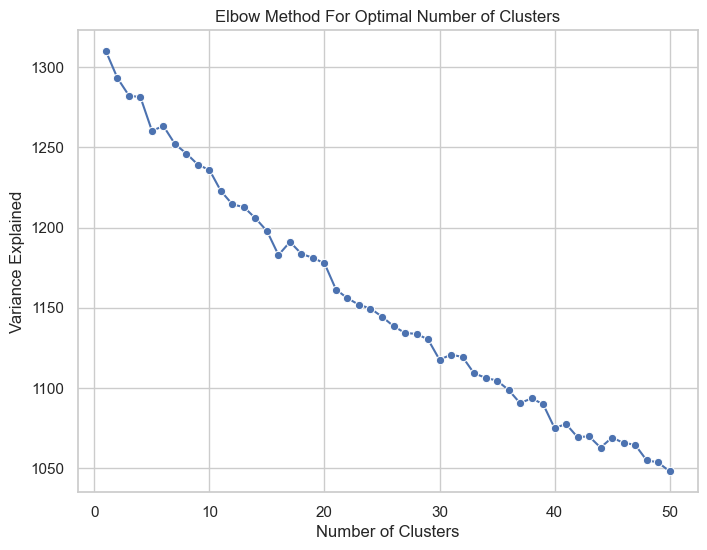

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(list(new_df['categories']))
# Range of number of clusters to test
num_clusters_range = range(1, 51)  # Adjust the range as needed

# List to store the variance explained for each number of clusters
variance_explained = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    variance_explained.append(kmeans.inertia_)

# Plot the elbow curve
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x=num_clusters_range, y=variance_explained, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Explained')
plt.show()

Cluster 1:  taking pictures,  taking pictures,  photo taking,  Take pictures,  Taking pictures,  algorithm for taking pictures,  taking photos,  taking pictures,  took pictures,  Taking pictures during the day,  Taking photo,  reliability of taking pictures,  pictures,  Taking portrait photos,  take pictures,  take pictures casually,  effect of taking pictures,  speed of taking pictures,  tuning of taking pictures,  Taking photos,  takes pictures
Cluster 2:  ultimate stable frame rate,  feel bad in hand,  frame,  feel texture,  frame drop,  rightangle frame,  Feel,  frame drops,  feel,  holding feel,  frame feel,  bright middle frame,  The feel,  use feel,  screen look and feel,  frame rate,  middle frame,  hand feel,  look and feel,  viewfinder frame,  high frame rate,  display frame rate scheduling
Cluster 3: water,  dont play games,  overall UI interaction,  visual impact,  latency,  ISO key combination,  take photos,  like,  high refresh rate strategy,  low frequency,  1000,  rangl

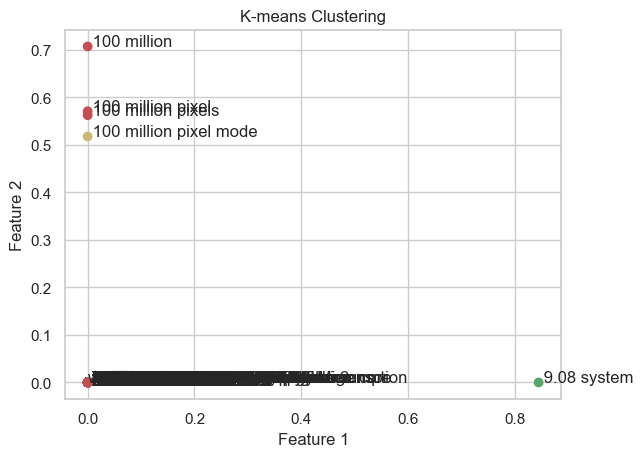

In [10]:
# K-means clustering
num_clusters = 15  # You should choose an appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters,init='k-means++', max_iter=300, n_init=500)
kmeans.fit(tfidf_matrix)

# Get cluster labels
cluster_labels = kmeans.labels_

# Create a dictionary to store elements in each cluster
clusters = {i: [] for i in range(num_clusters)}

# Populate the clusters dictionary
for i, word in enumerate(new_df['categories']):
    cluster_label = cluster_labels[i]
    clusters[cluster_label].append(word)

new_list_categories = {}    
# Print the words in each cluster
for cluster_label, cluster_words in clusters.items():
    print(f"Cluster {cluster_label + 1}: {', '.join(cluster_words)}")
# Define a mapping of colors for plotting
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create a list of colors corresponding to cluster labels
cluster_colors = [colors[label % len(colors)] for label in cluster_labels]

# Plot the data points in a 2D space
plt.scatter(tfidf_matrix.toarray()[:, 0], tfidf_matrix.toarray()[:, 1], c=cluster_colors, marker='o')

# Add labels to data points
for i, txt in enumerate(new_df['categories']):
    plt.annotate(txt, (tfidf_matrix.toarray()[i, 0], tfidf_matrix.toarray()[i, 1]))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
# Show the plot
plt.show()

In [111]:
# 0 : system 
# 1 : game
# 2 : photo and color
# 3: screen
# 4: video
# 5: system




for i in clusters[6]:
    print(i)

 consume power
 charging power
 power
 balanced performance power consumption
 25W power
 sense of power consumption
 standby power
 energy consumption
 baseband power consumption
 power drop
 lose power
 drop power
 Power consumption
 consumption
 power consumption optimization
 power consumption
 computing power


In [ ]:
# Create a new dictionary with the desired key
new_key = "hello"
new_dict = {new_key: original_dict[0]
# Print the new dictionary
print(new_dict)

/Users/hkhnhan/Code/VBUD/dev_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/hkhnhan/Code/VBUD/dev_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hkhnhan/Code/VBUD/dev_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hkhnhan/Code/VBUD/dev_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chan

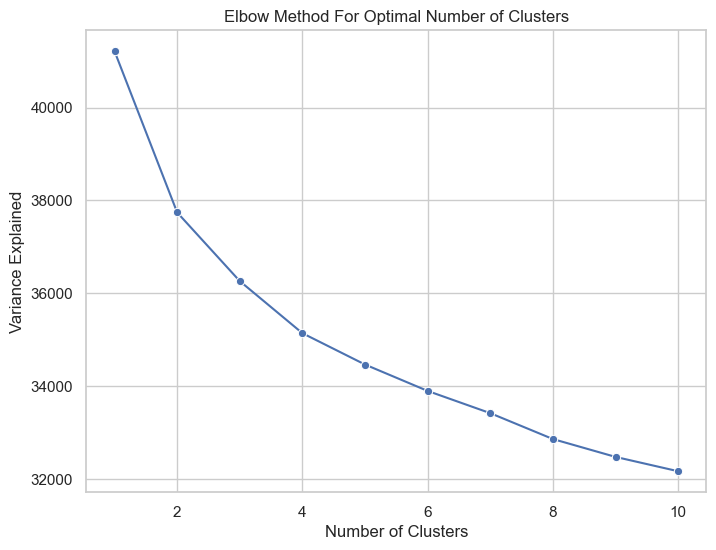

In [69]:
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
import numpy as np
import torch

# Load a pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Get BERT embeddings for the sentences
embeddings = []
for sentence in new_df['categories']:
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    pooled_output = outputs.last_hidden_state.mean(dim=1)
    embeddings.append(pooled_output.numpy().flatten())


num_clusters_range = range(1, 11)  # Adjust the range as needed

# List to store the variance explained for each number of clusters
variance_explained = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(np.array(embeddings))
    variance_explained.append(kmeans.inertia_)

# Plot the elbow curve
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x=num_clusters_range, y=variance_explained, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Explained')
plt.show()
# Perform K-Means clustering on BERT embeddings
# kmeans = KMeans(n_clusters=2, random_state=0)
# clusters = kmeans.fit_predict(np.array(embeddings))

# # Print the clusters
# for i, cluster in enumerate(clusters):
#     print(f"Data point {i} belongs to cluster {cluster}")


In [74]:
# Perform K-Means clustering on BERT embeddings
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(np.array(embeddings))
clustered_data = {}

# Iterate through the data and assign each data point to its corresponding cluster
for i, cluster in enumerate(clusters):
    if cluster not in clustered_data:
        clustered_data[cluster] = []
    clustered_data[cluster].append(new_df['categories'][i])  # Append the original data point to the cluster

/Users/hkhnhan/Code/VBUD/dev_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [112]:
# for i in clustered_data[0]:
#     print(i)
from wordcloud import WordCloud
result={'cluster':labels,'content':data['content']}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['content'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster:', k)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [6]:
# Read each file and add to data frame with id
id = 1
for subdir in sub_dirs:
    dir_path = os.path.join(path, subdir)
    files = os.listdir(dir_path)
    for file in files:
        file_path = os.path.join(dir_path, file)
        text = open(file_path).read()
        text = text.replace('\n',' ')
        #id = os.path.splitext(file)[0]
        data = data.append([[int(id), text, subdir]], ignore_index = True)
        filename.append(file)
        id = id + 1

In [7]:
col_list = ['id','content','class']
data.columns = col_list

In [8]:
data.head()

,id,content,class
0,1,Ad sales boost Time Warner profit Quarterly p...,business
1,2,Dollar gains on Greenspan speech The dollar h...,business
2,3,Yukos unit buyer faces loan claim The owners ...,business
3,4,High fuel prices hit BA's profits British Air...,business
4,5,Pernod takeover talk lifts Domecq Shares in U...,business


In [9]:
data.tail()

,id,content,class
2220,2221,BT program to beat dialler scams BT is introd...,tech
2221,2222,Spam e-mails tempt net shoppers Computer user...,tech
2222,2223,Be careful how you code A new European direct...,tech
2223,2224,US cyber security chief resigns The man makin...,tech
2224,2225,Losing yourself in online gaming Online role ...,tech


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2225 non-null   int64 
 1   content  2225 non-null   object
 2   class    2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [12]:
data['class'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [13]:
data['class'].isnull().any()

False

In [14]:
data['content'].isnull().any()

False

In [15]:
data['class'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: class, dtype: int64

<AxesSubplot:>

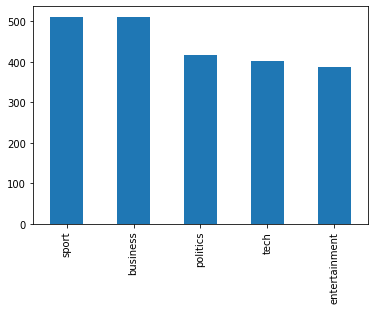

In [16]:
data['class'].value_counts().plot(kind='bar')

In [17]:
# Dùng TfidVectorizer để convert kiểu chuỗi sang số
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['content'])

In [18]:
X_array = X.toarray()
print(X_array)

[[0.         0.02245262 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00738551 0.         ... 0.         0.         0.        ]]


In [19]:
# Giá trị của data sau khi parse thành dạng số
X_df = pd.DataFrame(X_array, columns = vectorizer.get_feature_names()).add_prefix('TFIDF_')
X_df.head()

,TFIDF_00,TFIDF_000,TFIDF_0001,TFIDF_000bn,TFIDF_000m,TFIDF_000s,TFIDF_000th,TFIDF_001,TFIDF_001and,TFIDF_001st,...,TFIDF_zooms,TFIDF_zooropa,TFIDF_zornotza,TFIDF_zorro,TFIDF_zubair,TFIDF_zuluaga,TFIDF_zurich,TFIDF_zutons,TFIDF_zvonareva,TFIDF_zvyagintsev
0,0.0,0.022453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.019769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Nhận xét:
Dựa vào số lượng thuộc tính dữ liệu (29126 features) thì ta sẽ khó dựa vào dendrogram để chia ra các nhóm khác nhau vì dendrogram sẽ khó để biểu diễn tính chất cho từng thuộc tính. Bên cạnh đó, K-Means gom nhóm dựa vào các đặc điểm chung (số lượng từ ngữ đặc trưng trong các bài viết) để gom cụm. <br/>
=> Trong trường hợp này K-Means có lẽ sẽ thể hiện tốt hơn dùng Hierarchical

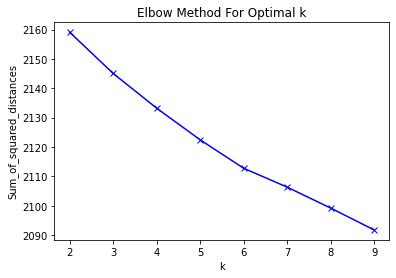

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics

Sum_of_squared_distances = []
distortions = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Nhận xét:
Ta thấy biểu đồ gần như là một đường thẳng. Nguyên nhân này có thể là do số lượng nhóm chia ra (k) không nhiều nên không có sự khác biệt quá lớn. <br/>
Tuy nhiên nếu nhìn kĩ thì ở điểm k = 6 có độ gấp khúc lớn hơn các điểm khác. Dựa vào phương pháp Elbow Method thì ta chọn k = 6 cho Mô hình của mình.

In [21]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

KMeans(max_iter=200, n_clusters=6)

In [22]:
# Top terms per cluster:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 game
 england
 win
 said
 cup
 match
 team
 players
 injury
 play
Cluster 1:
 mobile
 people
 said
 users
 technology
 music
 digital
 net
 microsoft
 phone
Cluster 2:
 mr
 labour
 election
 blair
 party
 brown
 said
 howard
 tax
 tory
Cluster 3:
 said
 mr
 government
 new
 year
 company
 people
 000
 uk
 firm
Cluster 4:
 film
 best
 awards
 award
 festival
 films
 actor
 oscar
 album
 band
Cluster 5:
 growth
 economy
 oil
 economic
 yukos
 said
 bank
 prices
 dollar
 year


In [31]:
labels=model.labels_
clustering=pd.DataFrame(list(zip(data['id'],labels)),columns=['id','cluster'])
print(clustering.sort_values(by=['id']))

        id  cluster
0        1        3
1        2        5
2        3        5
3        4        3
4        5        3
...    ...      ...
2220  2221        1
2221  2222        1
2222  2223        1
2223  2224        3
2224  2225        1

[2225 rows x 2 columns]


In [24]:
labels_series = pd.Series(labels)
labels_series.value_counts()

3    779
0    479
1    334
4    244
5    204
2    185
dtype: int64

In [25]:
labels_series.count()

2225

Cluster: 0


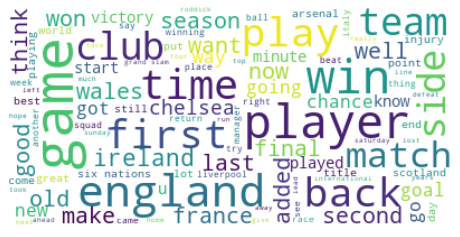

Cluster: 1


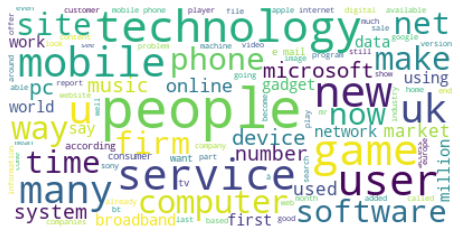

Cluster: 2


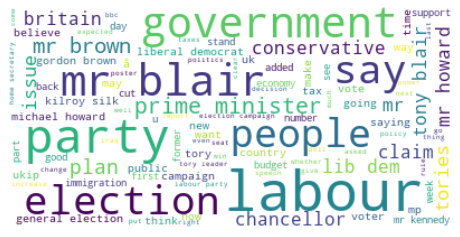

Cluster: 3


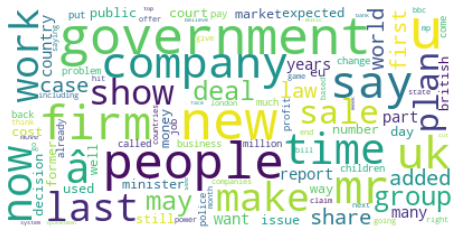

Cluster: 4


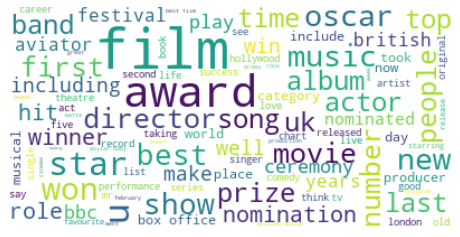

Cluster: 5


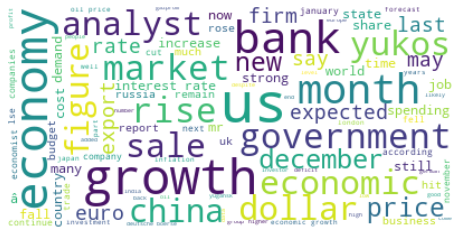

In [28]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
list_of_words = ['said', 'told', 'made', 'set', 'will', 'need', 'use', 'help', 'one', 'two', 'three',' four', 'year', 'take']
for word in list_of_words:
    stopwords.add(word)

result={'cluster':labels,'content':data['content']}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['content'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stopwords).generate(text)
    print('Cluster:', k)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Kết luận:
Các cụm (cluster) kết quả cho ra có chủ đề tương đối gần giống với các chủ đề được phân loại từ trước.
- Cluster 0 chứa các keywords giống chủ đề Sports.
- Cluster 1 chứa các keywords liên quan đến Technology.
- Cluster 4 bao gồm các từ khóa được sử dụng nhiều trong chủ đề Entertainment.
- Cluster 5 có các từ khóa thường được tìm kiếm trong chủ đề business.
- Cluster 2 và 3 có các keywords trong chủ đề Politics. Trong đó cluster 2 đa số nói về politics nhưng thiên về chính trị thuần (bầu cử, chiến lược...) nhiều hơn và Cluster 3 là những tin tức Politics nhưng có pha trộn vào một chút kinh tế. <br/>
=> Các bài tin tức được phân loại hợp lí.